<a href="https://colab.research.google.com/github/RaghadAlnouri/Raghad/blob/master/R_Alnouri_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Train an autoencoder and use it to initialize a neural network

Fill in the missing code (autoencoder).

Train the autoencoder on the full unlabeled data.

Initialize a neural network with the `encoder` of the autoencoder.

Train the neural network on a reduced dataset.

Loading Fashion MNIST

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [0]:
X_test.min()

0.0

In [0]:
X_train.shape

(55000, 28, 28, 1)

In [0]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

Train an auto-encoder on the full training data

Task: Replace the `...` with the appropriate code

In [0]:
np.random.seed(42)
conv_encoder = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="relu", input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(128, kernel_size=3, padding="SAME", activation="relu"),
    
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding="SAME", activation="relu",
                                 input_shape=[7, 7, 128]),
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="SAME", activation="relu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=1, padding="SAME", activation="sigmoid"),
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])
output = conv_ae.predict(X_valid[:10])
print(output.shape)

conv_ae.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.0), 
                metrics=[rounded_accuracy])

history = conv_ae.fit(X_train, X_train, epochs=20, batch_size=128,
                      validation_data=[X_valid, X_valid])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
(10, 28, 28, 1)
Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 5s 88us/sample - loss: 0.0450 - rounded_accuracy: 0.8632 - val_loss: 0.0239 - val_rounded_accuracy: 0.9088
Epoch 2/20
55000/55000 [==============================] - 4s 77us/sample - loss: 0.0198 - rounded_accuracy: 0.9206 - val_loss: 0.0168 - val_rounded_accuracy: 0.9268
Epoch 3/20
55000/55000 [==============================] - 4s 77us/sample - loss: 0.0158 - rounded_accuracy: 0.9306 - val_loss: 0.0145 - val_rounded_accuracy: 0.9342
Epoch 4/20
55000/55000 [==============================] - 4s 77us/sample - loss: 0.0134 - rounded_accuracy: 0.9374 - val_loss: 0.0119 - val_rounded_accuracy: 0.9427
Epoch 5/20
55000/55000 [==============================] - 4s 78us/sample - loss: 0.0119 - rounded_accuracy: 0.9418 - val_loss: 0.0116 - val_rounded_accuracy: 0.9409
Epoch 6/20
55000/55000 [=====

In [0]:
# save the encoder
conv_encoder.save('conv_encoder.h5')

Add a final layer for classification

In [0]:
conv_encoder = keras.models.load_model('conv_encoder.h5')

model_pretrained = tf.keras.models.Sequential([ 
                          conv_encoder,
                          keras.layers.Flatten(),
                          keras.layers.Dense(10, activation="softmax"),
                  ])
model_pretrained.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Lets take a small number of training samples and try to train on that

In [0]:
np.random.seed(42)
labeled_idx = np.random.choice(np.arange(X_train.shape[0]), size=500, replace=False)
X_train_small = X_train[labeled_idx]
y_train_small = y_train[labeled_idx]

In [0]:
X_train_small.shape


(500, 28, 28, 1)

In [0]:
y_train_small.shape

(500,)

In [0]:
# Fit the model
history_small = model_pretrained.fit(X_train_small, y_train_small, epochs=30, validation_data=(X_valid, y_valid), batch_size=128)

Train on 500 samples, validate on 5000 samples
Epoch 1/30
500/500 [==============================] - 0s 690us/sample - loss: 8.6583 - acc: 0.1900 - val_loss: 2.0374 - val_acc: 0.3316
Epoch 2/30
500/500 [==============================] - 0s 266us/sample - loss: 2.0134 - acc: 0.3220 - val_loss: 1.6733 - val_acc: 0.4612
Epoch 3/30
500/500 [==============================] - 0s 258us/sample - loss: 1.4594 - acc: 0.4840 - val_loss: 1.2981 - val_acc: 0.5018
Epoch 4/30
500/500 [==============================] - 0s 258us/sample - loss: 1.2398 - acc: 0.4800 - val_loss: 1.0979 - val_acc: 0.5662
Epoch 5/30
500/500 [==============================] - 0s 271us/sample - loss: 1.0590 - acc: 0.5800 - val_loss: 1.0150 - val_acc: 0.5810
Epoch 6/30
500/500 [==============================] - 0s 248us/sample - loss: 0.9718 - acc: 0.5820 - val_loss: 0.9068 - val_acc: 0.6216
Epoch 7/30
500/500 [==============================] - 0s 263us/sample - loss: 0.8443 - acc: 0.6320 - val_loss: 0.8456 - val_acc: 0.6744
E

In [0]:
history_small.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

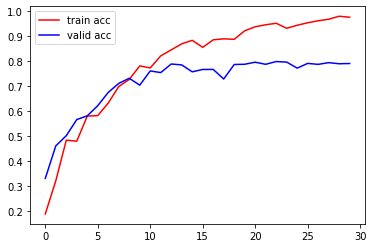

In [0]:
import matplotlib.pyplot as plt
plt.plot(history_small.history['acc'], 'r')
plt.plot(history_small.history['val_acc'], 'b')
plt.legend(['train acc', 'valid acc'])

## Building a new encoder

In [0]:
np.random.seed(42)
conv_encoder_new = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="relu", input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(128, kernel_size=3, padding="SAME", activation="relu"),
    
])

In [0]:
model_new = tf.keras.models.Sequential([conv_encoder_new, keras.layers.Flatten(),
                          keras.layers.Dense(10, activation="softmax")])
model_new.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Fit the new model
history_small_new = model_new.fit(X_train_small, y_train_small, epochs=30, validation_data=(X_valid, y_valid), batch_size=128)

Train on 500 samples, validate on 5000 samples
Epoch 1/30
500/500 [==============================] - 0s 532us/sample - loss: 2.1342 - acc: 0.2500 - val_loss: 1.5306 - val_acc: 0.3318
Epoch 2/30
500/500 [==============================] - 0s 251us/sample - loss: 1.2811 - acc: 0.5220 - val_loss: 0.9624 - val_acc: 0.5974
Epoch 3/30
500/500 [==============================] - 0s 244us/sample - loss: 0.9593 - acc: 0.6100 - val_loss: 0.8480 - val_acc: 0.6912
Epoch 4/30
500/500 [==============================] - 0s 258us/sample - loss: 0.7505 - acc: 0.7040 - val_loss: 0.7620 - val_acc: 0.7272
Epoch 5/30
500/500 [==============================] - 0s 243us/sample - loss: 0.6908 - acc: 0.7300 - val_loss: 0.8775 - val_acc: 0.7064
Epoch 6/30
500/500 [==============================] - 0s 245us/sample - loss: 0.6075 - acc: 0.7660 - val_loss: 0.7202 - val_acc: 0.7276
Epoch 7/30
500/500 [==============================] - 0s 274us/sample - loss: 0.5521 - acc: 0.7700 - val_loss: 0.6062 - val_acc: 0.7818
E

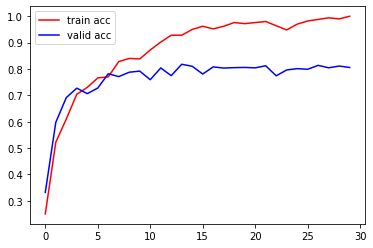

In [0]:
import matplotlib.pyplot as plt
plt.plot(history_small_new.history['acc'], 'r')
plt.plot(history_small_new.history['val_acc'], 'b')
plt.legend(['train acc', 'valid acc'])

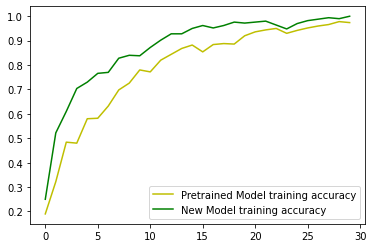

In [0]:
plt.plot(history_small.history['acc'],'y' ,history_small_new.history['acc'], 'g')
plt.legend(['Pretrained Model training accuracy', 'New Model training accuracy'])

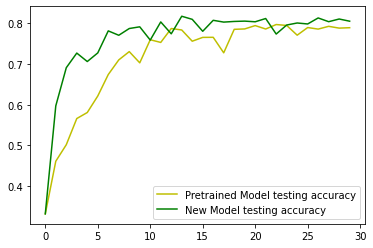

In [0]:
plt.plot(history_small.history['val_acc'],'y' ,history_small_new.history['val_acc'], 'g')
plt.legend(['Pretrained Model testing accuracy', 'New Model testing accuracy'])

Is it better than an feedforward neural network?

No, it is not clearly better
